Importing necessary libraries

In [1]:
import numpy 
import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the Data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

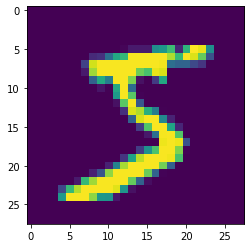

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Reshaping the data

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

Applying one hot encoding

In [8]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model Building

Add CNN layer

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(number_of_classes, activation='softmax'))

Compiling the model

In [15]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Fitting the model

In [16]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2300 - accuracy: 0.9494 - val_loss: 0.1204 - val_accuracy: 0.9679
Epoch 2/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 0.0755 - val_accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0714 - val_accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0870 - val_accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0848 - val_accuracy: 0.9793


Observing the metrics

In [17]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.08483671396970749, 0.9793000221252441]


Predicting the output

In [18]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 131ms/step
[[2.96652001e-08 3.79850813e-16 1.11186960e-09 6.70866473e-10
  2.13789815e-12 1.25469374e-11 2.22672356e-17 9.99998927e-01
  1.04291689e-06 4.51264387e-10]
 [3.74365285e-08 9.38301034e-11 9.99999404e-01 5.33688198e-12
  1.15603997e-14 4.09626446e-15 6.12610904e-07 8.32542861e-17
  3.19686784e-08 5.73641341e-13]
 [2.08492268e-09 9.99993205e-01 5.82821720e-08 7.56190195e-13
  4.35483798e-06 1.30432261e-06 9.87758098e-10 4.86668000e-07
  5.65580422e-07 3.21603692e-13]
 [1.00000000e+00 2.94075440e-16 6.98581470e-12 3.78582934e-14
  1.24822516e-13 1.80849849e-11 5.29138067e-10 2.65260226e-13
  3.98870798e-10 2.11039577e-08]]


In [19]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Saving the model

In [20]:
model.save("models/mnistCNN.h5")

Taking images as input and checking results

In [25]:
from tensorflow.keras.models import load_model
model = load_model(r'C:/Users/jebas/Hand written recognition System/models/mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
    img = Image.open('data/' + str(index) + '.png').convert("L")
    img = img.resize((28,28))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)
    y_pred = model.predict(im2arr)
    print(np.argmax(y_pred))

1/1 [==============================] - 0s 92ms/step
0
1/1 [==============================] - 0s 30ms/step
9
1/1 [==============================] - 0s 38ms/step
6
1/1 [==============================] - 0s 36ms/step
5
